# Introduction and Setup

This notebook analyzes coffee shop sales data to identify key trends and insights. We begin by importing the necessary Python libraries for data manipulation and visualization.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## 1. Data Loading

We load the coffee shop sales data from the specified CSV file. Error handling is included in case the file is not found.

In [4]:
# Load the dataset
df = pd.read_csv('/Users/sametbaybatur/Downloads/coffee_project/Coffee_Shop_Sales.csv')

## 2. Initial Data Exploration

This section provides an initial overview of the dataset:
- **`df.head()`**: Displays the first few rows to understand the data structure.
- **`df.info()`**: Shows the data types of each column and the number of non-null values.
- **`df.describe()`**: Provides summary statistics (count, mean, std, min, max, quartiles) for numerical columns.
- **`df.nunique()`**: Shows the number of unique values in each column, which can be helpful for identifying categorical variables.
- **`df.isna().sum()`**: Checks for missing values in each column.

In [6]:
# Initial exploration
print("First few rows of the dataframe:")
print(df.head())

print("\nInformation about the dataframe:")
print(df.info())

print("\nSummary statistics of numerical columns:")
print(df.describe())

print("\nNumber of unique values in each column:")
print(df.nunique())

print("\nChecking for missing values:")
print(df.isna().sum())

First few rows of the dataframe:
   transaction_id transaction_date transaction_time  transaction_qty  \
0               1         1/1/2023          7:06:11                2   
1               2         1/1/2023          7:08:56                2   
2               3         1/1/2023          7:14:04                2   
3               4         1/1/2023          7:20:24                1   
4               5         1/1/2023          7:22:41                2   

   store_id   store_location  product_id  unit_price    product_category  \
0         5  Lower Manhattan          32         3.0              Coffee   
1         5  Lower Manhattan          57         3.1                 Tea   
2         5  Lower Manhattan          59         4.5  Drinking Chocolate   
3         5  Lower Manhattan          22         2.0              Coffee   
4         5  Lower Manhattan          57         3.1                 Tea   

            product_type               product_detail  
0  Gourmet brewed cof

## 3. Data Cleaning and Feature Engineering

In this section, we prepare the data for analysis:
- **`df['transaction_date'] = pd.to_datetime(...)`**: Converts the 'transaction_date' column to datetime objects, ensuring proper time-based analysis. The format `'%d/%m/%Y'` is specified based on the likely format in the CSV.
- **Feature Extraction**: We extract relevant time-based features such as 'month', 'day', 'day_name', and 'hour' to enable analysis across different time dimensions.
- **Revenue Calculation**: A 'Revenue' column is calculated by multiplying 'transaction_qty' and 'unit_price'.
- **Categorical Ordering**: The 'month' and 'day_name' columns are converted to categorical types with a specified order. This is crucial for ensuring chronological plotting of monthly and daily trends.
- **`df.head()`**: Displays the updated DataFrame with the new features.

In [8]:
# Data Cleaning and Feature Engineering
df['transaction_date'] = pd.to_datetime(df['transaction_date'], format='%d/%m/%Y') # Convert to datetime
df['month'] = df['transaction_date'].dt.month_name()# Extract month
df['day'] = df['transaction_date'].dt.day # Extract day
df['day_name'] = df['transaction_date'].dt.day_name() # Extract day name
df['hour'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S').dt.hour # Extract hour from transaction time
df['Revenue'] = df['transaction_qty'] * df['unit_price'] # Calculate revenue

# Define the correct order of months for consistent plotting
month_order = ['January', 'February', 'March', 'April', 'May', 'June']
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

# Define the correct order of days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_name'] = pd.Categorical(df['day_name'], categories=day_order, ordered=True)

print("\nFirst few rows of the dataframe after feature engineering:")
print(df.head())


First few rows of the dataframe after feature engineering:
   transaction_id transaction_date transaction_time  transaction_qty  \
0               1       2023-01-01          7:06:11                2   
1               2       2023-01-01          7:08:56                2   
2               3       2023-01-01          7:14:04                2   
3               4       2023-01-01          7:20:24                1   
4               5       2023-01-01          7:22:41                2   

   store_id   store_location  product_id  unit_price    product_category  \
0         5  Lower Manhattan          32         3.0              Coffee   
1         5  Lower Manhattan          57         3.1                 Tea   
2         5  Lower Manhattan          59         4.5  Drinking Chocolate   
3         5  Lower Manhattan          22         2.0              Coffee   
4         5  Lower Manhattan          57         3.1                 Tea   

            product_type               product_det

## 4. Overall Sales Metrics

We start with some high-level metrics to understand the overall sales performance:
- **Average Transaction Value**: Calculates the mean revenue per transaction.
- **Total Revenue**: Calculates the sum of all revenue generated.

In [10]:
# Overall Sales Analysis
average_transaction_value = df['Revenue'].mean()
print(f"\nAverage Transaction Value: ${average_transaction_value:.2f}")

total_revenue = df['Revenue'].sum()
print(f"\nTotal Revenue: ${total_revenue:.2f}")


Average Transaction Value: $4.69

Total Revenue: $698812.33


## 5. Time-Based Sales Analysis

Understanding sales trends over time is crucial. Here we analyze:

- **Hourly Sales Trend**: This plot shows the total quantity of items sold during each hour of the day, highlighting peak and off-peak hours.
- **Daily Sales Trend (Day of the Week)**: This bar chart illustrates the total revenue generated on each day of the week, revealing potential weekday vs. weekend patterns.
- **Monthly Sales Trend**: This bar chart displays the total revenue for each month in the dataset, showing seasonal trends or overall growth.
- **Daily Sales Trend (Day of the Month)**: This line plot shows the total revenue for each day of the month, which can help identify patterns within a month.

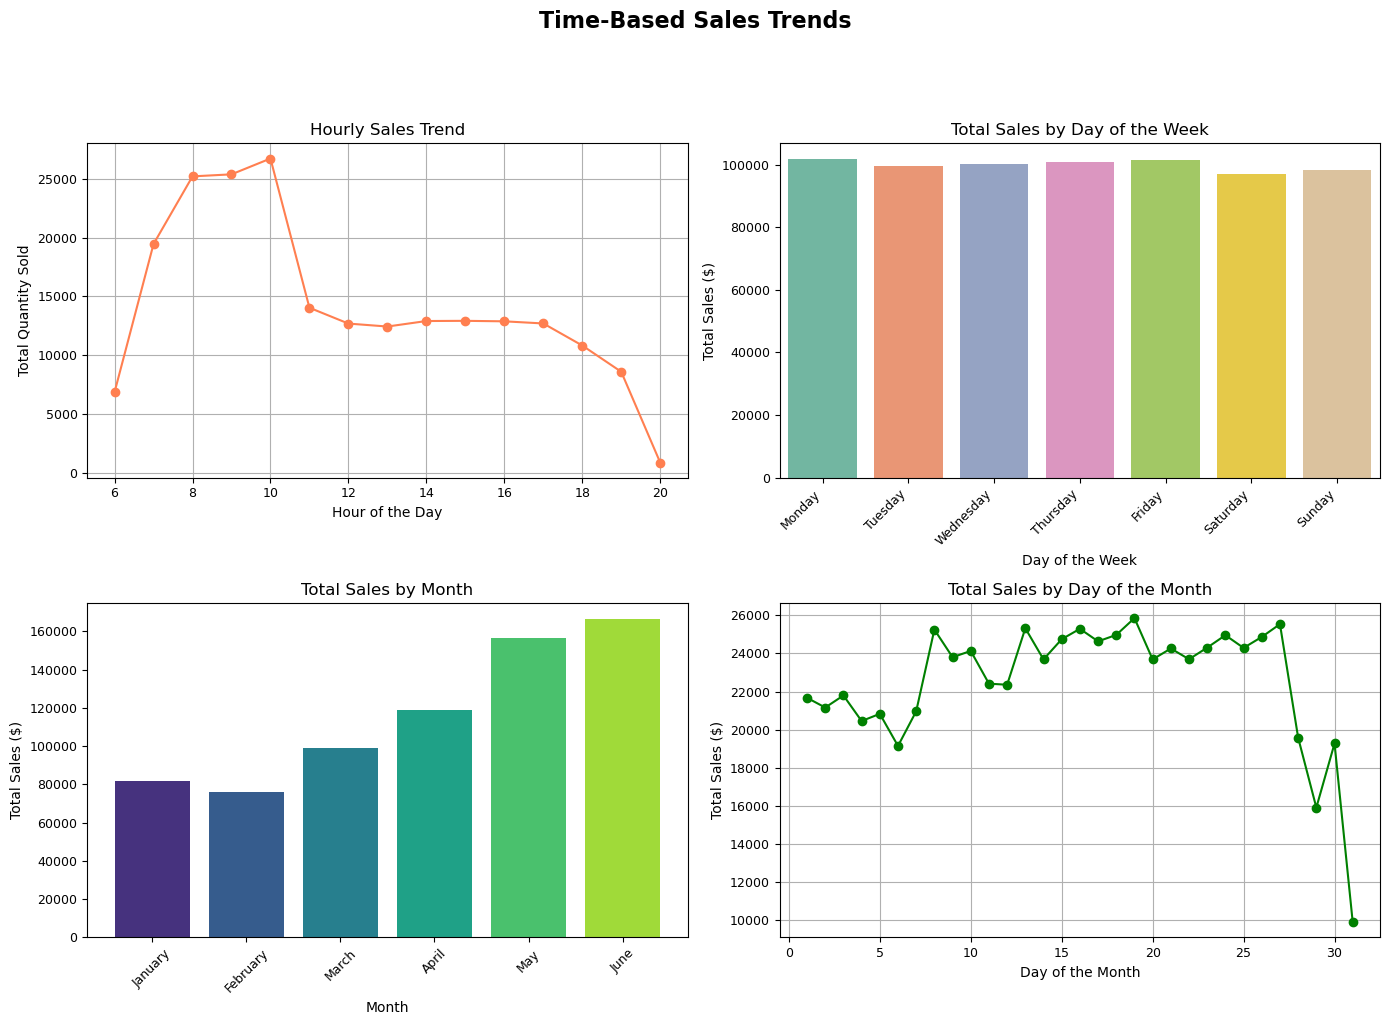

In [12]:
# Time-Based Sales Analysis

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Time-Based Sales Trends', fontsize=16, fontweight='bold', y=1.02)

# 1. Hourly Sales Trend
hourly_sales = df.groupby('hour')['transaction_qty'].sum()
axes[0, 0].plot(hourly_sales.index, hourly_sales.values, marker='o', linestyle='-', color='coral')
axes[0, 0].set_title('Hourly Sales Trend', fontsize=12)
axes[0, 0].set_xlabel('Hour of the Day', fontsize=10)
axes[0, 0].set_ylabel('Total Quantity Sold', fontsize=10)
axes[0, 0].grid(True)
axes[0, 0].tick_params(axis='both', labelsize=9)

# 2. Daily Sales Trend (Day of Week)
day_of_week_sales = df.groupby('day_name')['Revenue'].sum().reindex(day_order)
sns.barplot(x=day_of_week_sales.index, y=day_of_week_sales.values, palette='Set2', ax=axes[0, 1])
axes[0, 1].set_title('Total Sales by Day of the Week', fontsize=12)
axes[0, 1].set_xlabel('Day of the Week', fontsize=10)
axes[0, 1].set_ylabel('Total Sales ($)', fontsize=10)
axes[0, 1].tick_params(axis='x', rotation=45, labelsize=9)
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), ha='right')
axes[0, 1].tick_params(axis='y', labelsize=9)

# 3. Monthly Sales Trend
monthly_sales = df.groupby('month')['Revenue'].sum()
axes[1, 0].bar(monthly_sales.index, monthly_sales.values, color=sns.color_palette('viridis', len(monthly_sales)))
axes[1, 0].set_title('Total Sales by Month', fontsize=12)
axes[1, 0].set_xlabel('Month', fontsize=10)
axes[1, 0].set_ylabel('Total Sales ($)', fontsize=10)
axes[1, 0].tick_params(axis='x', rotation=45, labelsize=9)
axes[1, 0].tick_params(axis='y', labelsize=9)

# 4. Daily Sales Trend (Day of Month)
day_of_month_sales = df.groupby('day')['Revenue'].sum()
axes[1, 1].plot(day_of_month_sales.index, day_of_month_sales.values, marker='o', linestyle='-', color='green')
axes[1, 1].set_title('Total Sales by Day of the Month', fontsize=12)
axes[1, 1].set_xlabel('Day of the Month', fontsize=10)
axes[1, 1].set_ylabel('Total Sales ($)', fontsize=10)
axes[1, 1].grid(True)
axes[1, 1].tick_params(axis='both', labelsize=9)

plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout for suptitle
plt.show()

## 6. Product-Based Sales Analysis

This section focuses on understanding which products are driving sales and which are underperforming:

- **Total Sales Quantity by Product Category**: This bar chart shows the total quantity sold for each product category, indicating the most popular categories.
- **Top 10 Best-Selling Product Types**: This bar chart highlights the top 10 individual product types based on the total quantity sold, revealing the most popular specific products.
- **Top 5 Least Selling Product Types**: This bar chart visualizes the top 5 product types with the lowest total quantity sold. Identifying these underperforming products can inform decisions regarding product offerings, promotions, or potential discontinuation to optimize inventory and sales focus.

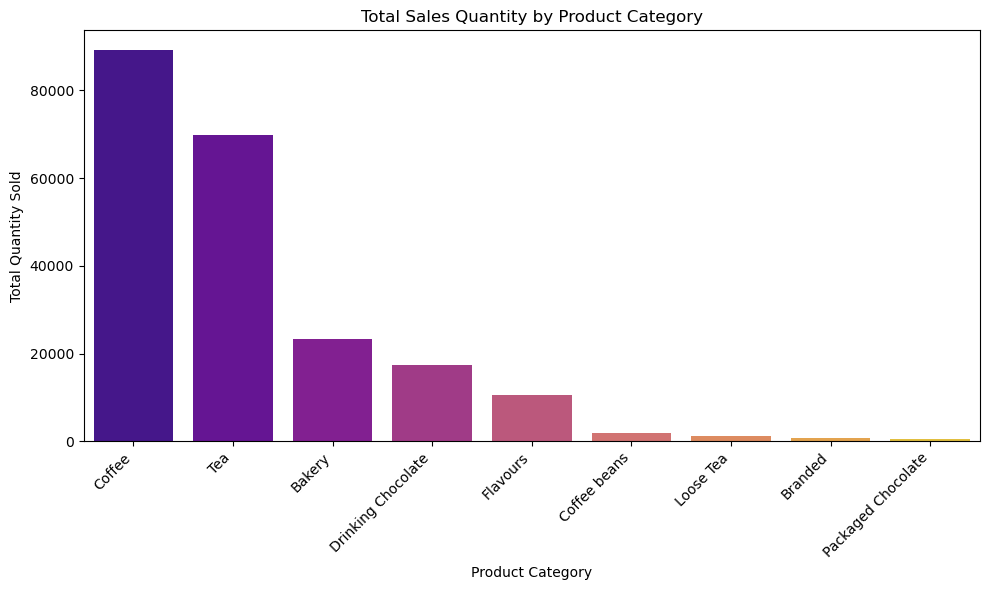

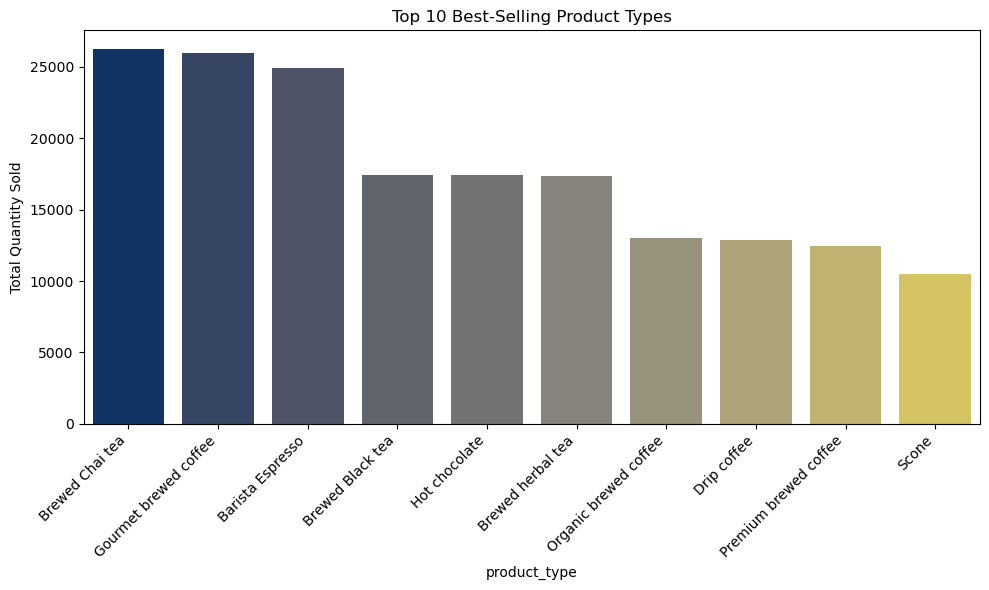

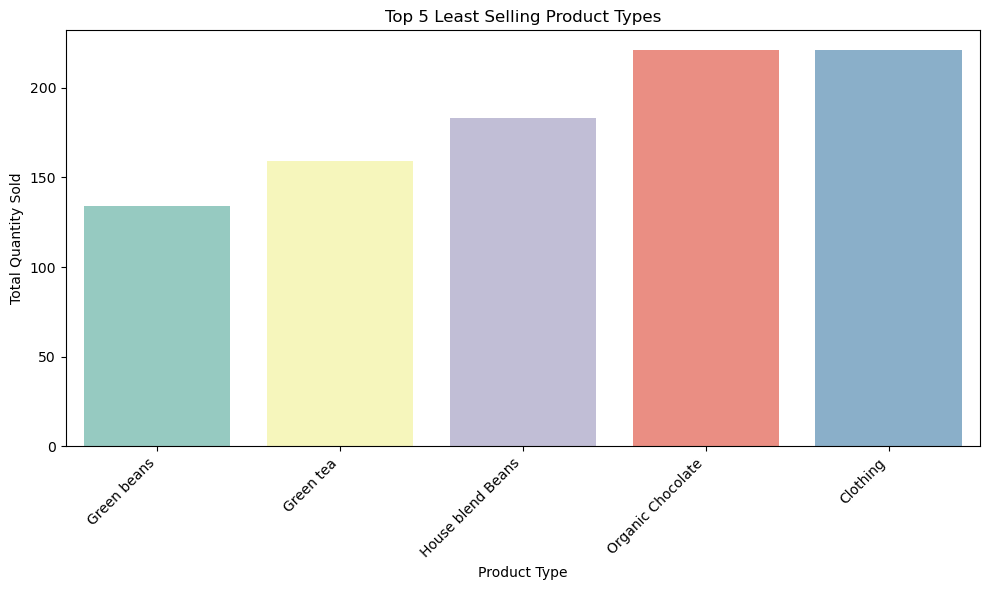

In [14]:
# Product-Based Sales Analysis

# Analyze product category sales
category_sales = df.groupby('product_category')['transaction_qty'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.index, y=category_sales.values, palette='plasma')
plt.title('Total Sales Quantity by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Analyze specific product type sales (Top 10)
product_type_sales = df.groupby('product_type')['transaction_qty'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=product_type_sales.index, y=product_type_sales.values, palette='cividis')
plt.title('Top 10 Best-Selling Product Types')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Analyze least selling product types (Bottom 5)
least_selling_product_types = df.groupby('product_type')['transaction_qty'].sum().sort_values(ascending=True).head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=least_selling_product_types.index, y=least_selling_product_types.values, palette='Set3')
plt.title('Top 5 Least Selling Product Types')
plt.xlabel('Product Type')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## 7. Size Category Analysis

This section explores the distribution of product sales across different size categories, inferred from the 'product_detail' column. Understanding the popularity of different sizes can help inform inventory management and product strategy.

- **Distribution of Product Sales by Size Category (All Categories)**: This pie chart shows the proportion of sales attributed to different identified size categories (Large, Small, Regular, Medium), as well as an 'Other' category for products where size information could not be extracted.


Distribution of Product Sales by Size Category (All Categories):
size_category
Regular    45789
Large      44885
Other      44518
Small      13924
Name: count, dtype: int64


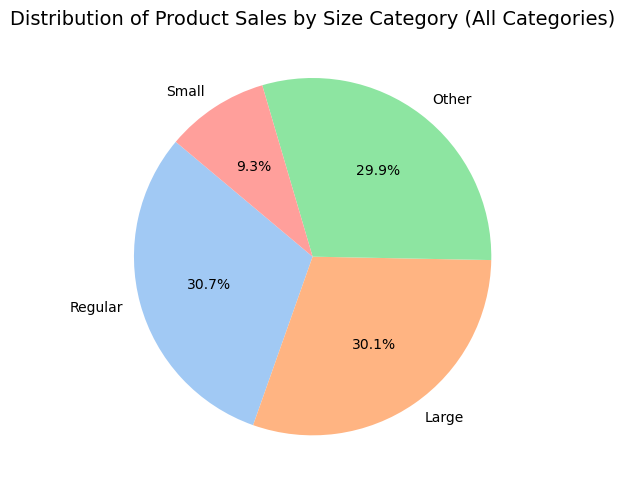

In [16]:
import re

# Analyze size categories across all product categories

# Create size categories
df['size_category'] = 'Other'
df.loc[df['product_detail'].str.contains(r'\bLg\b', case=False), 'size_category'] = 'Large'
df.loc[df['product_detail'].str.contains(r'\bSm\b', case=False), 'size_category'] = 'Small'
df.loc[df['product_detail'].str.contains(r'\bRg\b', case=False), 'size_category'] = 'Regular'
df.loc[df['product_detail'].str.contains(r'\bMd\b', case=False), 'size_category'] = 'Medium'

# Analyze the distribution of size categories
size_category_counts = df['size_category'].value_counts()
print("\nDistribution of Product Sales by Size Category (All Categories):")
print(size_category_counts)

# Visualize the distribution
plt.figure(figsize=(5, 5))
plt.pie(size_category_counts, labels=size_category_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Product Sales by Size Category (All Categories)', fontsize=14)
plt.tight_layout()
plt.show()

## 8. Store Performance Analysis

Analyzing sales performance across different store locations is crucial for strategic decisions:

- **Total Revenue by Store**: This pie chart shows the proportion of total revenue contributed by each store.
- **Average Transaction Value by Store**: This pie chart illustrates the average revenue per transaction at each store, indicating customer spending habits at different locations.
- **Total Quantity Sold by Store**: This pie chart displays the proportion of the total number of items sold by each store, providing insight into the overall transaction volume and how busy each location is.

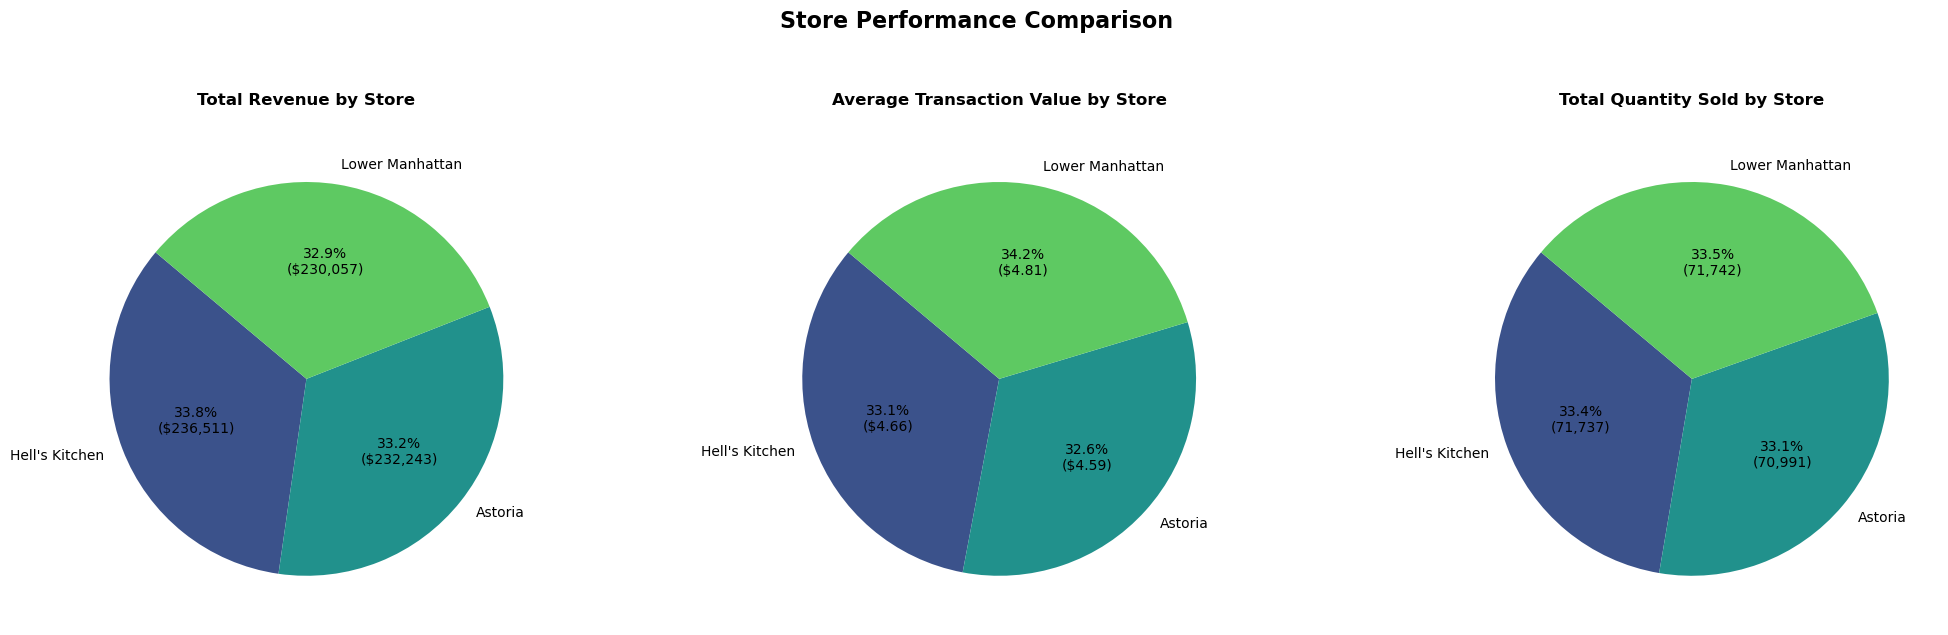

In [18]:
# Store Performance Analysis

# Calculate metrics
store_stats = df.groupby('store_location').agg({'Revenue': ['sum', 'mean'], 'transaction_qty': 'sum'}).sort_values(('Revenue', 'sum'), ascending=False)
colors = sns.color_palette('viridis', len(store_stats))

# Create figure
fig, axes = plt.subplots(1, 3, figsize=(21, 6))  # Adjusted for 3 subplots

# 1. Total Revenue by Store
axes[0].pie(store_stats[('Revenue', 'sum')],
            labels=store_stats.index,
            autopct=lambda p: f'{p:.1f}%\n(${int(p*store_stats[("Revenue", "sum")].sum()/100):,})',
            startangle=140,
            colors=colors,
            textprops={'fontsize': 10})
axes[0].set_title('Total Revenue by Store', pad=20, fontweight='bold')

# 2. Average Transaction Value by Store
axes[1].pie(store_stats[('Revenue', 'mean')],
            labels=store_stats.index,
            autopct=lambda p: f'{p:.1f}%\n(${(p*store_stats[("Revenue", "mean")].sum()/100):.2f})',
            startangle=140,
            colors=colors,
            textprops={'fontsize': 10})
axes[1].set_title('Average Transaction Value by Store', pad=20, fontweight='bold')

# 3. Total Quantity Sold by Store
axes[2].pie(store_stats[('transaction_qty', 'sum')],
            labels=store_stats.index,
            autopct=lambda p: f'{p:.1f}%\n({int(p*store_stats[("transaction_qty", "sum")].sum()/100):,})',
            startangle=140,
            colors=colors,
            textprops={'fontsize': 10})
axes[2].set_title('Total Quantity Sold by Store', pad=20, fontweight='bold')

# Formatting
plt.suptitle('Store Performance Comparison', y=1.05, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## 9. Monthly Revenue Comparison by Store

To gain a deeper understanding of individual store performance over time, this section visualizes the monthly revenue for each store location.

- **Monthly Revenue Comparison by Store**: This grouped bar chart displays the total revenue for each store for each of the six months in the dataset. This allows for a direct comparison of revenue trends and performance across different stores on a monthly basis.

<Figure size 1200x700 with 0 Axes>

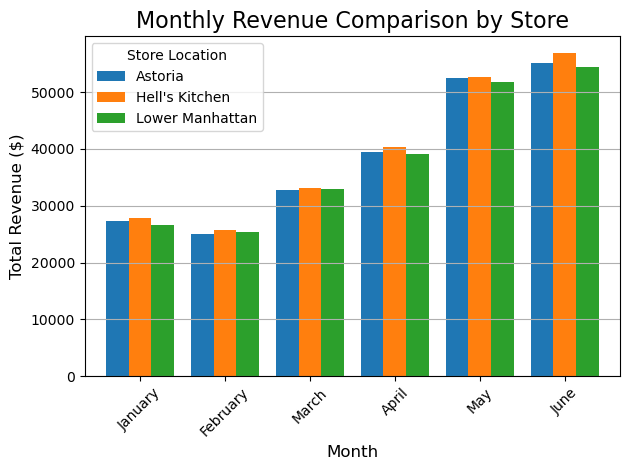

In [20]:
# Monthly Revenue Comparison by Store (Grouped Bar Chart)

# Group by store location and month, then sum the revenue
monthly_revenue_by_store = df.groupby(['month', 'store_location'])['Revenue'].sum().unstack()

# Define the order of months for the plot
month_order_plot = ['January', 'February', 'March', 'April', 'May', 'June']
monthly_revenue_by_store = monthly_revenue_by_store.reindex(month_order_plot)

# Create the grouped bar chart
plt.figure(figsize=(12, 7))
monthly_revenue_by_store.plot(kind='bar', width=0.8)  # Use pandas plotting directly
plt.title('Monthly Revenue Comparison by Store', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Store Location', fontsize=10)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## 10. Product Category Performance by Store

This heatmap reveals which product categories sell best at different store locations. The color intensity and annotations indicate the total quantity sold for each category-store combination.

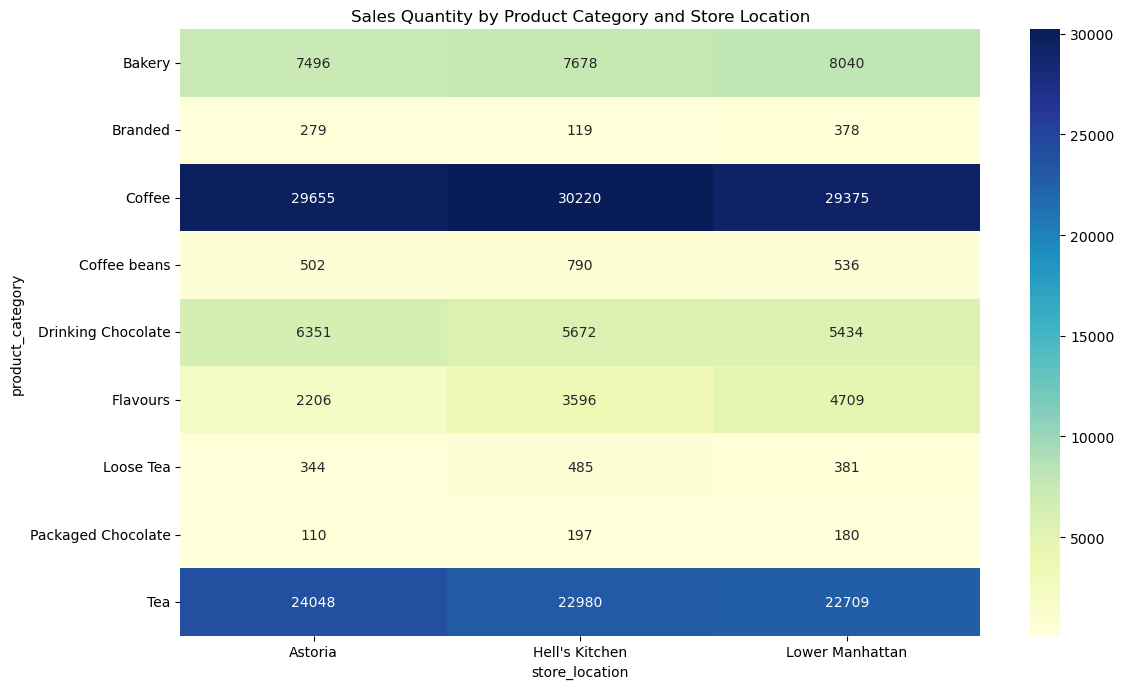

In [22]:
# Relationship Between Product Category and Store Location

pivot_category_location = pd.pivot_table(df,
                                       values='transaction_qty',
                                       index='product_category',
                                       columns='store_location',
                                       aggfunc='sum',
                                       margins=True,
                                       margins_name='Total')

plt.figure(figsize=(12, 7))
sns.heatmap(pivot_category_location.drop('Total', errors='ignore').drop('Total', axis=1, errors='ignore'),
            annot=True, cmap='YlGnBu', fmt='.0f')
plt.title('Sales Quantity by Product Category and Store Location')
plt.tight_layout()
plt.show()

## 11. Transaction Frequency by Hour and Store

This heatmap shows the number of transactions occurring at each store during different hours of the day. This can help understand peak transaction times for each location.

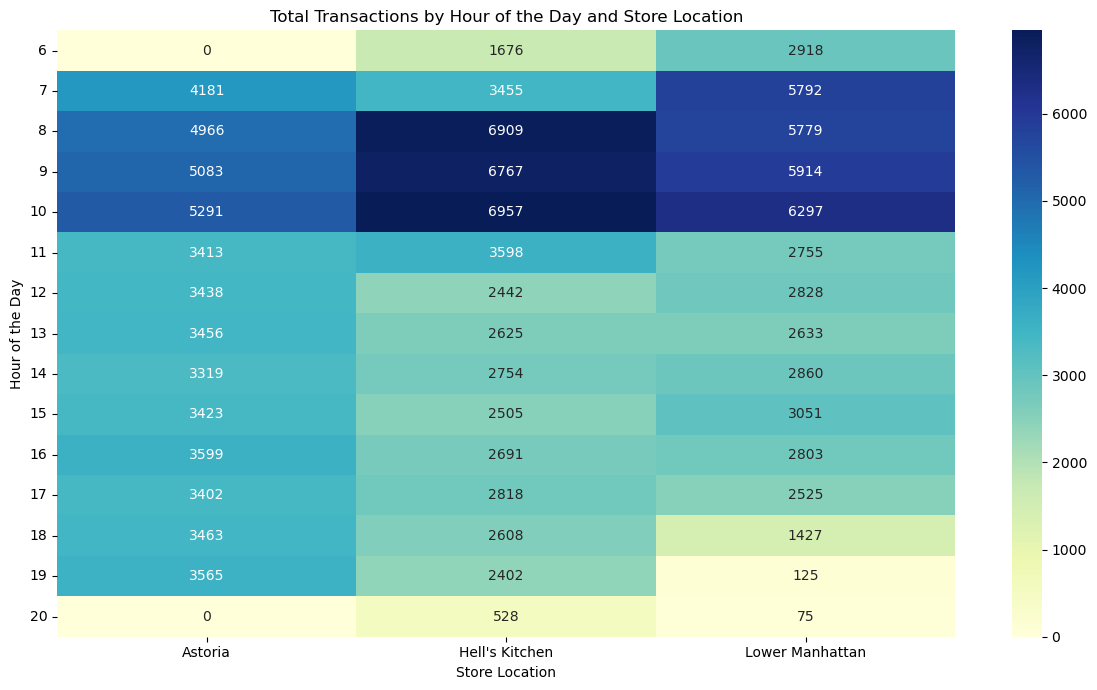

In [24]:
# Transaction Frequency by Hour and Store

pivot_transactions_hour_location = pd.pivot_table(df,
                                                 values='transaction_id',
                                                 index='hour',
                                                 columns='store_location',
                                                 aggfunc='count')

# Create the heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(pivot_transactions_hour_location.fillna(0).astype(int), annot=True, cmap='YlGnBu', fmt='d')
plt.title('Total Transactions by Hour of the Day and Store Location')
plt.xlabel('Store Location')
plt.ylabel('Hour of the Day')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## 12. Top Performing Transactions

This section identifies and visualizes the top 15 individual transactions with the highest revenue across all stores, highlighting which store was responsible for these high-value sales.

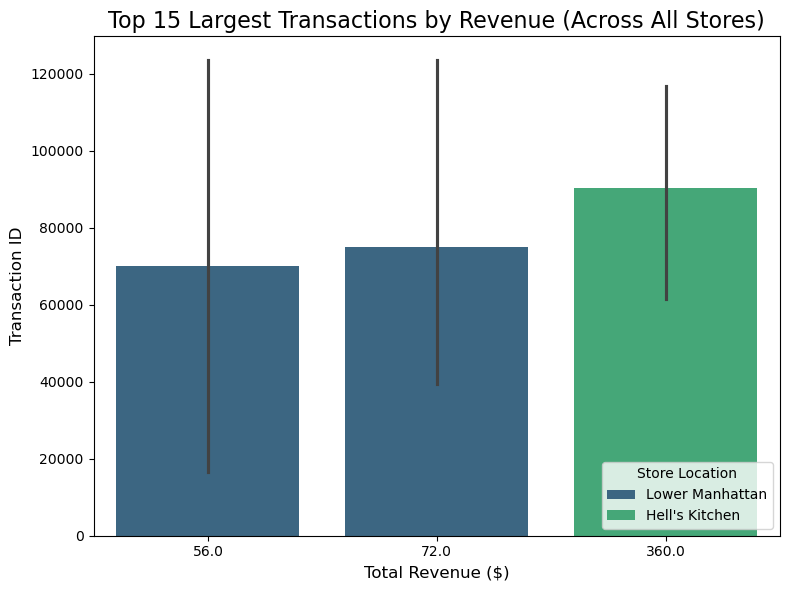

In [26]:
# Top Transactions Analysis

# Calculate the top 15 largest transactions
top_15_overall = df.groupby(['transaction_id', 'store_location'])['Revenue'].sum().nlargest(15).reset_index(name='Total Revenue')

# Create the vertical bar chart
plt.figure(figsize=(8, 6)) # Adjusted figure height for better readability of vertical bars
sns.barplot(
    x='Total Revenue',
    y='transaction_id',
    hue='store_location',
    data=top_15_overall,
    orient='v',
    palette='viridis',
    dodge=False  # Each transaction has one location in our grouping
)
plt.title('Top 15 Largest Transactions by Revenue (Across All Stores)', fontsize=16)
plt.xlabel('Total Revenue ($)', fontsize=12)
plt.ylabel('Transaction ID', fontsize=12)
plt.legend(title='Store Location', fontsize=10)
plt.tight_layout()
plt.show()

## Summary and Key Findings

In conclusion, this analysis of the coffee shop sales data has revealed several important trends and insights:

**Overall Sales Performance:**
- The dataset comprises 149,116 transactions across 181 days, revealing key sales patterns and store performance.
- Total revenue generated is $698,812.33, with an average transaction value of $4.69.
- The business demonstrates a positive growth trend in revenue over the past five months.

**Time-Based Sales Trends:**
- Peak sales activity occurs between 8:00 AM and 10:00 AM.
- Monday is the busiest day for sales, while Saturday experiences the lowest sales volume.
- Monthly revenue showed a slight dip after the first month but exhibited consistent growth in the subsequent months.
- Within each month, sales tend to peak around the 6th and then gradually decline significantly after the 27th. This pattern may correlate with customer salary cycles and budget constraints towards the month's end.

**Product Performance:**
- The leading product categories by sales volume are "coffee" and "tea", significantly outperforming others.
- "Package chocolate" and "branded" items are the least sold product categories.
- The top three best-selling individual products are "Brewed Chai tea", "Gourmet brewed coffee", and "Barista espresso".
- The least selling individual items include 'green beans', 'green tea', 'house blend beans', 'organic chocolate', and 'clothing'.

**Size Category Analysis:**
- The distribution of product sales by identified size categories shows "Regular" and "Large" sizes are very close in popularity, each accounting for approximately 30% of sales where size could be determined.
- "Small" size products represent around 9% of sales with identified sizes.
- A significant portion (almost 30%) of products do not have clearly identifiable size categories in their details.

**Store Performance:**
- Revenue distribution is relatively balanced across the three stores.
- "Hell's Kitchen" is the top-performing store in terms of total revenue, generating $236,511 and accounting for approximately 33.8% of total revenue.
- "Lower Manhattan" has the highest average transaction value at $4.81, representing a 34.2% share of the average transaction value.
- In terms of total quantity sold, the distribution across the three stores is also quite similar, with "Lower Manhattan" having a slightly higher volume at approximately 33.5% of the total (71,742 items sold).

**Operational Insights:**
- The "Astoria" store appears to be closed at 6:00 AM and 8:00 PM, as indicated by zero transactions during these hours.
- The "Lower Manhattan" store experiences a noticeable drop in sales by 7:00 PM and a significant decline by 8:00 PM (around 75 fewer transactions compared to earlier times), suggesting a potential opportunity to evaluate closing hours.
- The largest individual transactions in terms of revenue are frequently associated with the sale of packaged coffee beans, primarily at the "Hell's Kitchen" location.

**Overall Conclusion:**
- The coffee shop demonstrates strong overall sales with a positive growth trajectory. Understanding the impact of salary cycles on monthly sales could inform targeted promotions or strategies.
- Focusing on the popular "coffee" and "tea" categories and the top-selling individual products is crucial. Investigating strategies to boost sales in underperforming categories and products may be beneficial.
- The similarity in total quantity sold across stores suggests a relatively even distribution of customer traffic, although "Lower Manhattan" handles a slightly higher volume.
- The near-equal popularity of "Regular" and "Large" sizes could inform inventory and purchasing decisions. Addressing the significant portion of products with unidentified sizes might improve future size-based analysis.
- Operational adjustments, such as reviewing opening/closing hours for the "Astoria" and "Lower Manhattan" stores, could potentially optimize resource allocation and profitability.